In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("dataset.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB


## Visualizing the data

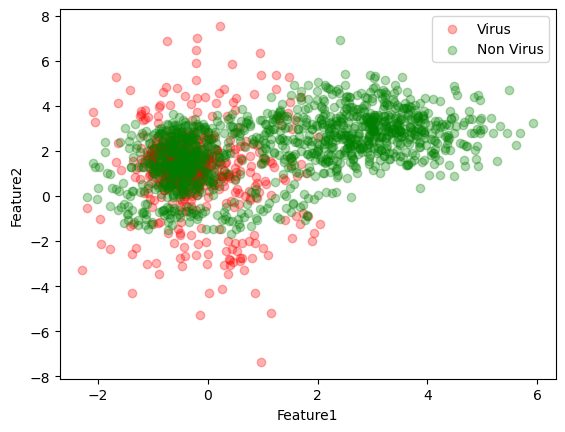

In [3]:
virus = df[df.isVirus == True]
NonVirus = df[df.isVirus == False]

plt.scatter(virus.feature_1, virus.feature_2, color="red", label="Virus", alpha= 0.3)
plt.scatter(NonVirus.feature_1,  NonVirus.feature_2, color="green", label="Non Virus" , alpha=0.3)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.show()

In [4]:
df.describe

<bound method NDFrame.describe of       feature_1  feature_2  feature_3  feature_4  isVirus
0     -0.233467   0.308799   2.484015   1.732721    False
1      1.519003   1.238482   3.344450   0.783744    False
2      0.400640   1.916748   3.291096  -0.918519    False
3     -1.616474   0.209703   1.461544  -0.291837    False
4      1.480515   5.299829   2.640670   1.867559     True
...         ...        ...        ...        ...      ...
1994   2.532559   2.139847   3.859104   2.190373    False
1995        NaN   3.562990        NaN   2.499590    False
1996   4.059027   1.977436   2.144760   4.257220    False
1997   3.457310   3.962342   3.770837   3.243168    False
1998   3.578521   3.349654        NaN   1.562209    False

[1999 rows x 5 columns]>

## Clean up the Null datas

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 0 to 1997
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1622 non-null   float64
 1   feature_2  1622 non-null   float64
 2   feature_3  1622 non-null   float64
 3   feature_4  1622 non-null   float64
 4   isVirus    1622 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.9 KB


In [7]:
features=["feature_1","feature_2","feature_3","feature_4"]

# we separate the features by x
x= df[features]

# we separate the isVirus by y
y= df[["isVirus"]]

## We standardize the features data to speed up the process.

In [8]:
x = StandardScaler().fit_transform(x)
x

array([[-0.60639514, -0.92895453, -0.08054236,  0.5276557 ],
       [ 0.40434794, -0.34634548,  0.50865172, -0.00963915],
       [-0.24067173,  0.07870738,  0.47211671, -0.97343252],
       ...,
       [ 0.98891968,  0.21851748,  0.86106756,  0.78677079],
       [ 1.86931551,  0.11673854, -0.3128522 ,  1.95698481],
       [ 1.52227281,  1.36062993,  0.80062543,  1.38284572]])

In [9]:
# We reduce data from 4 dimensions to 2 dimensions with PCA Projection
pca = PCA(n_components= 2)
principalComponent= pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponent, columns=["PrincipalComponent1", "PrincipalComponent2"])

principalDf

,PrincipalComponent1,PrincipalComponent2
0,-0.502969,0.083462
1,0.176588,-0.419387
2,-0.604819,-0.664419
3,-1.851695,0.436393
4,1.646012,0.093908
...,...,...
1617,3.063520,0.334514
1618,1.140236,0.309544
1619,1.352521,-0.540355
1620,2.312110,0.947619


In [10]:
# Let's add our isVirus column to the end of our PCA dataframe.
finalDf = pd.concat([principalDf, df[["isVirus"]]], axis=1)
finalDf.dropna(inplace=True)
finalDf

,PrincipalComponent1,PrincipalComponent2,isVirus
0,-0.502969,0.083462,False
1,0.176588,-0.419387,False
2,-0.604819,-0.664419,False
3,-1.851695,0.436393,False
4,1.646012,0.093908,True
...,...,...,...
1616,1.085649,-0.319253,False
1618,1.140236,0.309544,False
1619,1.352521,-0.540355,False
1620,2.312110,0.947619,False


## Visualize the standardizated data

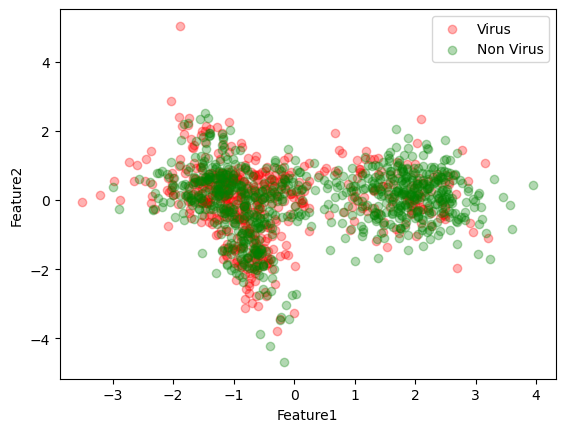

In [11]:
virus = finalDf[finalDf.isVirus == True]
NonVirus = finalDf[finalDf.isVirus == False]

plt.scatter(virus.PrincipalComponent1, virus.PrincipalComponent2, color="red", label="Virus", alpha= 0.3)
plt.scatter(NonVirus.PrincipalComponent1,  NonVirus.PrincipalComponent2, color="green", label="Non Virus" , alpha=0.3)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.show()

In [12]:
# separating the data train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)


In [13]:
sayac =1 
# to find the value of n that will give the most efficient accuracy rate
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, " " , "Accuracy Rate: %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1


1   Accuracy Rate: % 89.23076923076924
2   Accuracy Rate: % 91.6923076923077
3   Accuracy Rate: % 91.07692307692308
4   Accuracy Rate: % 90.76923076923077
5   Accuracy Rate: % 91.6923076923077
6   Accuracy Rate: % 88.92307692307693
7   Accuracy Rate: % 90.46153846153845
8   Accuracy Rate: % 90.46153846153845
9   Accuracy Rate: % 89.84615384615384
10   Accuracy Rate: % 89.23076923076924


/Users/furkangulenc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/furkangulenc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/furkangulenc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was pa

In [14]:


# we building our model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)

print("Validation result of our Test Data for K=2 ", knn.score(x_test,y_test))


Validation result of our Test Data for K=2  0.916923076923077


/Users/furkangulenc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/furkangulenc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/furkangulenc/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions